In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def image_plot(img):
    fig, axes = plt.subplots(1, 1, figsize=(12, 6), sharex=True, sharey=True)
    axes.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

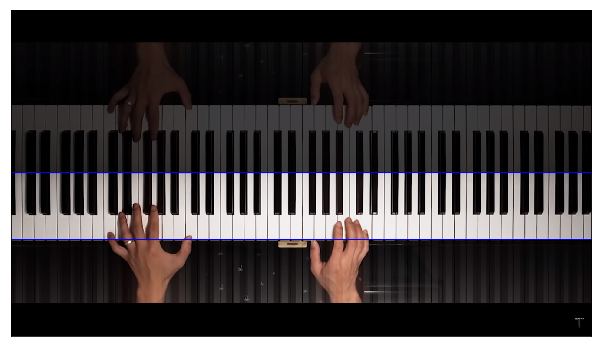

In [3]:
img = cv2.imread("piano.png")
(h, w, c) = img.shape

# Marcar corte
hi = 540
hf = 760
mimg = img.copy()
cv2.line(mimg, (0, hi), (w-1, hi), (255, 0, 0), 2)
cv2.line(mimg, (0, hf), (w-1, hf), (255, 0, 0), 2)

image_plot(cv2.cvtColor(mimg, cv2.COLOR_BGR2RGB))

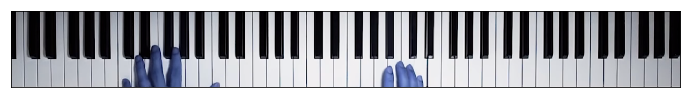

In [36]:
image_plot(img[hi:hf,:,:])

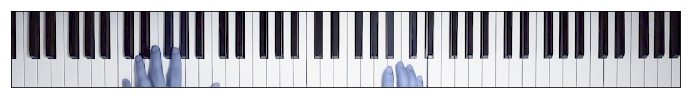

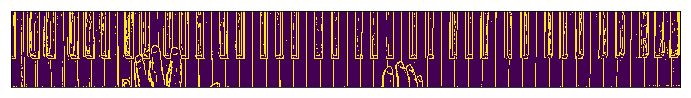

In [52]:
# Cortar a imagem
cropped = img[hi:hf,:,:]
#cropped = img[hi:hf-int((hf-hi)/2),:,:]
#cropped = img[hi:hf-int((hf-hi) * 2/3),:,:]

# Tratar a imagem
cropped = (((cropped.astype('float') / cropped.max()) ** 0.5) * 255).astype('uint8')

# Ver resultado
image_plot(cropped)

# Threshold
gscropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(gscropped, (5,5), 0)
# ret, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

th = cv2.adaptiveThreshold(gscropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Criar mascara
mask = th.max() - th
#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((9,9), np.uint8))

image_plot(mask)

mask = np.zeros(cropped.shape)

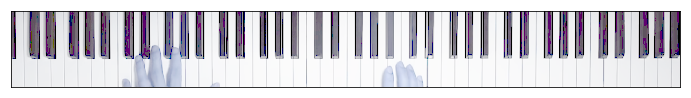

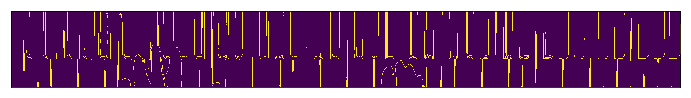

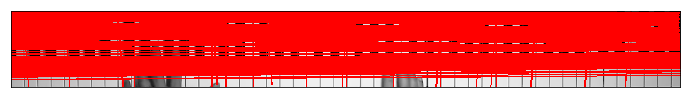

In [30]:
piano = img[hi:hf,:,:]
[piano_h, piano_w, piano_c] = piano.shape

n_piano = piano.astype('float32') / piano.max()

image_plot(((n_piano ** 0.2) * 255).astype('uint8'))

# Grayscale
piano = cv2.cvtColor(piano, cv2.COLOR_BGR2GRAY)

# Canny
edges = cv2.Canny(piano, 0, 200, 5)
image_plot(edges)

# Hough
lines = cv2.HoughLines(edges, 1, np.pi / 360, 150)

# Draw lines
aux = cv2.cvtColor(piano, cv2.COLOR_GRAY2RGB)
for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    x1 = int(x0 + piano_w * (-b))
    y1 = int(y0 + piano_h * (a))
    x2 = int(x0 - piano_w * (-b))
    y2 = int(y0 - piano_h * (a))
    
    cv2.line(aux, (x1, y1), (x2, y2), (255, 0, 0), 2)
image_plot(aux)